In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando

In [2]:
df = pd.read_csv("pizza_data.csv")

In [3]:
df.head()

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99


### Analisando

In [4]:
#371 linhas e 5 colunas

df.shape

(371, 5)

In [5]:
#Todos em str

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     371 non-null    object
 1   Pizza Name  371 non-null    object
 2   Type        371 non-null    object
 3   Size        371 non-null    object
 4   Price       371 non-null    object
dtypes: object(5)
memory usage: 14.6+ KB


In [6]:
#Nenhum nulo.

df.isnull().sum()

Company       0
Pizza Name    0
Type          0
Size          0
Price         0
dtype: int64

In [7]:
#Renomeando a coluna para português para ficar melhor

print(df.columns)

df.columns = ["Companhia", "Nome da Pizza", "Sabor", "Tamanho", "Preço"]

print(df.columns)

Index(['Company', 'Pizza Name', 'Type', 'Size', 'Price'], dtype='object')
Index(['Companhia', 'Nome da Pizza', 'Sabor', 'Tamanho', 'Preço'], dtype='object')


In [8]:
print("Companhias:", df["Companhia"].unique())

Companhias: ["Domino's Pizza" 'Pizza Hut' "Godfather's Pizza" "IMO's Pizza"]


In [9]:
print("Sabores:", df["Sabor"].unique())

Sabores: ['Cheeses Pizza' 'Specialty Pizzas' 'Feast Pizzas' 'Cheese Pizza'
 'Classic Recipe Pizzas' 'New Recipe Pizzas' 'Skinny Pizzas'
 'Gluten-Free Pizzas' 'Express Favorites']


In [10]:
print("Tamanho:", df["Tamanho"].unique())

Tamanho: ['Small (10")' 'Medium (12")' 'Large (14")' 'X-Large (16")' 'Medium'
 'Large' 'Personal' 'Small' 'Mini' 'Jumbo' 'X Large (16")']


In [11]:
df.head()

,Companhia,Nome da Pizza,Sabor,Tamanho,Preço
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99


### Transformando dados

#### Removendo "$" do preço (melhora a análise)

In [12]:
df["Preço"] = df["Preço"].apply(lambda x: float(x.split("$")[1]))

df.iloc[0][4]

5.99

In [13]:
df.describe()

,Preço
count,371.000000
mean,16.319326
std,5.714662
min,4.290000
25%,12.490000
50%,15.490000
75%,19.950000
max,29.990000


#### Transformar polegadas para cm

In [14]:
df["Tamanho"].head()

0     Small (10")
1    Medium (12")
2     Large (14")
3    Medium (12")
4     Small (10")
Name: Tamanho, dtype: object

In [15]:
df["Tamanho"].unique()

array(['Small (10")', 'Medium (12")', 'Large (14")', 'X-Large (16")',
       'Medium', 'Large', 'Personal', 'Small', 'Mini', 'Jumbo',
       'X Large (16")'], dtype=object)

In [16]:
def padronizar(tamanho):
    if tamanho == "Small":
        return 'Small (10")'

    elif tamanho == "Medium":
        return 'Medium (12")'

    elif tamanho == "Large":
        return 'Large (14")'

    elif tamanho == 'X Large (16")':
        return 'X-Large (16")'
    
    elif tamanho == "Mini":
        return 'Mini (6")'
    
    elif tamanho == "Jumbo":
        return 'Jumbo (36")'
    
    else:
        return tamanho


In [17]:
def polegada_cm(tamanho):

    if ")" in tamanho:
        try:
            polegadas = int(tamanho[-4:-2])
            centimetros = int(polegadas * 2.54)
            tamanho = tamanho.replace(tamanho[-4:-1], f"{centimetros} cm")
            return tamanho
            
        except:
            polegadas = int(tamanho[-3:-2])
            centimetros = int(polegadas * 2.54)
            tamanho = tamanho.replace(tamanho[-3:-1], f"{centimetros} cm")
            return tamanho
            
    
    else:
        return tamanho


In [18]:
df["Tamanho"] = df["Tamanho"].apply(padronizar)
df["Tamanho"] = df["Tamanho"].apply(polegada_cm)

In [19]:
df["Tamanho"].unique()

array(['Small (25 cm)', 'Medium (30 cm)', 'Large (35 cm)',
       'X-Large (40 cm)', 'Personal', 'Mini (15 cm)', 'Jumbo (91 cm)'],
      dtype=object)

In [20]:
def centimetros(tamanho):
    if ")" in tamanho:
        centimetros = tamanho[-6:-4]
        return int(centimetros)
    else:
        return 7 #Tamanho médio das pizzas 'personalizaveis'

In [21]:
df["Centimetros"] = df["Tamanho"].apply(centimetros)

In [22]:
df = df[["Companhia", "Nome da Pizza", "Sabor", "Tamanho", "Centimetros", "Preço"]]

In [23]:
df["Sabor"] = df["Sabor"].sort_values(ascending=False)

In [24]:
df

,Companhia,Nome da Pizza,Sabor,Tamanho,Centimetros,Preço
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,Small (25 cm),25,5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,Medium (30 cm),30,7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,Large (35 cm),35,9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,Medium (30 cm),30,7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,Small (25 cm),25,5.99
...,...,...,...,...,...,...
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,X-Large (40 cm),40,23.85
367,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,Small (25 cm),25,11.80
368,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,Medium (30 cm),30,14.95
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,Large (35 cm),35,18.65


## Analises

### Companhias mais famosas e pizzas mais famosas

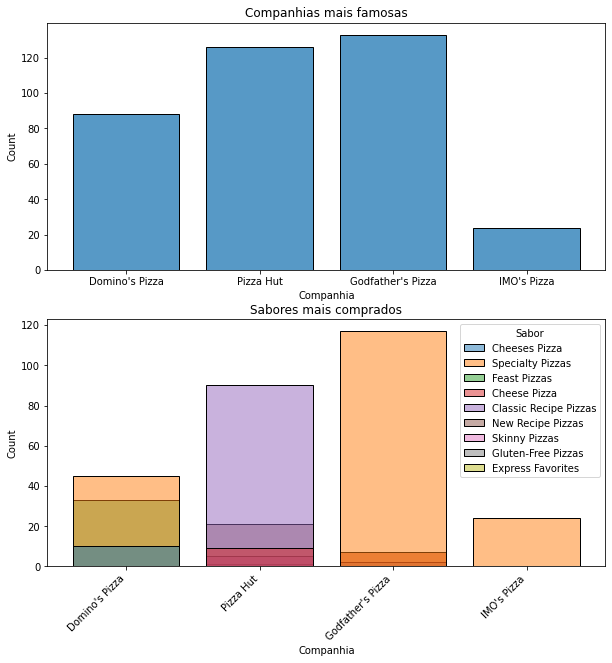

In [115]:
fig, (ax1, ax2) = plt.subplots(2, figsize=[10,10])


sns.histplot(data = df, x = "Companhia", shrink=.8, ax=ax1).set_title("Companhias mais famosas");
plt.xticks(rotation=45, ha="right");

sns.histplot(data = df, x = "Companhia", hue="Sabor", shrink=.8, discrete=True, ax=ax2).set_title("Sabores mais comprados");
plt.xticks(rotation=45, ha="right");

### Sabores mais comprados geral

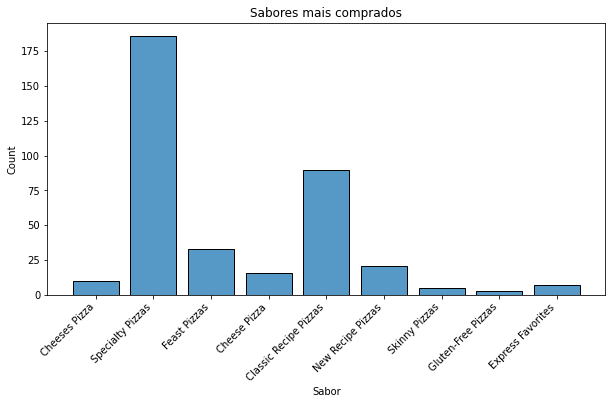

In [116]:
fig, ax = plt.subplots(figsize=[10,5])
sns.histplot(data = df, x = "Sabor", shrink=.8, discrete=True).set_title("Sabores mais comprados");
plt.xticks(rotation=45, ha="right");

### Preço médio das pizzas das empresas

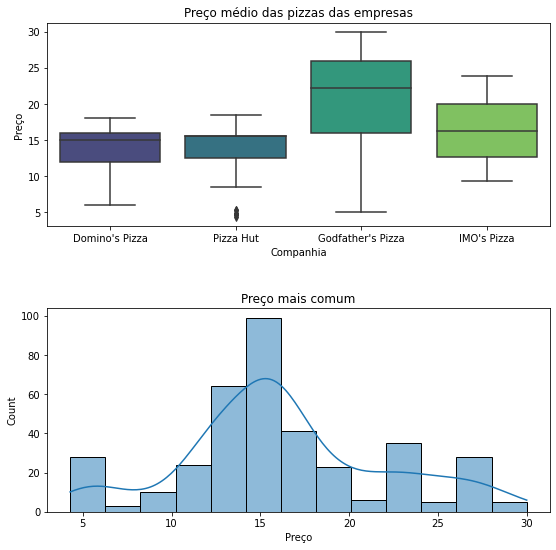

In [117]:
fig, (ax1, ax2) = plt.subplots(2,figsize=[9,9])
sns.boxplot(data=df, x="Companhia", y="Preço", palette="viridis",ax=ax1).set_title("Preço médio das pizzas das empresas");
sns.histplot(data=df, x="Preço", ax=ax2, kde="True").set_title("Preço mais comum");
plt.subplots_adjust(hspace = 0.4)

### Preço por tamanho companhias

Text(0.5, 1.0, 'Preço por Tamanho')

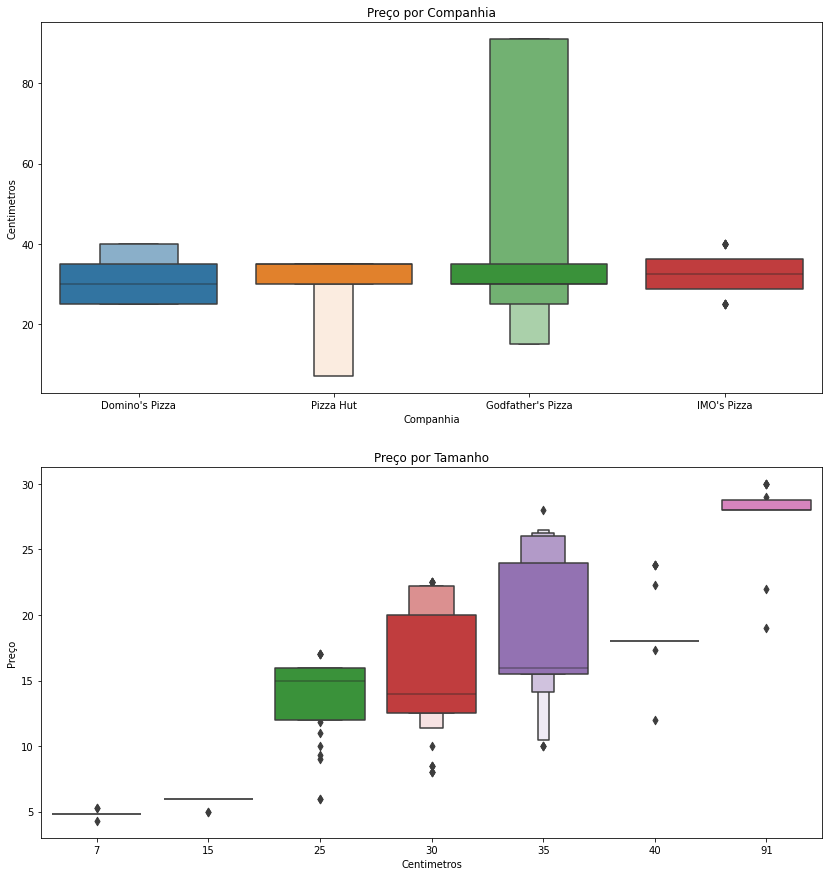

In [118]:
fig, ((ax1, ax2)) = plt.subplots(2,figsize=[14,15])
sns.boxenplot(data=df, x="Companhia", y="Centimetros", ax=ax1).set_title("Preço por Companhia")
sns.boxenplot(data=df, x="Centimetros", y="Preço",ax=ax2).set_title("Preço por Tamanho")

###  Preço médio por tamanho

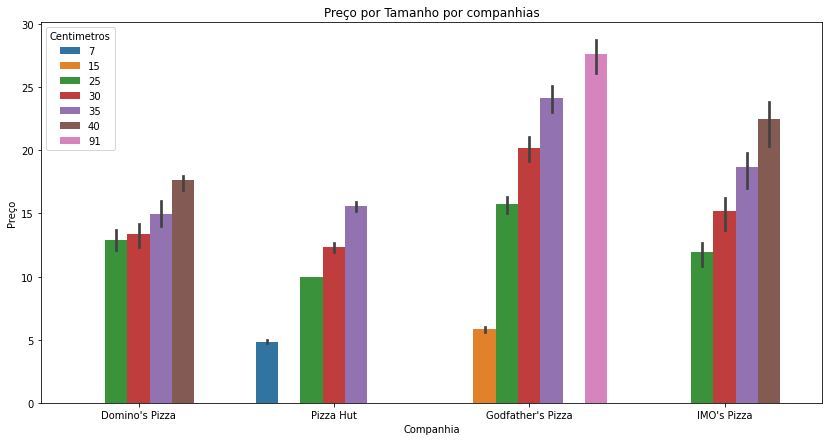

In [121]:
fig, ax = plt.subplots(figsize=[14,7])
sns.barplot(data=df, x="Companhia", y="Preço",hue="Centimetros").set_title("Preço por Tamanho por companhias");